In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [38]:
CBWs         = [6]
PBWs         = [24]
CWNDs        = [256]
TTIME        = 10
NUM_START    = 100
NUM_END      = 180
STEP         = 10
NUMEXP       = f"{NUM_START}-{NUM_END}"
TPTALGOs     = ['TCPreno','TCPcubic'] #,'UDP']
ATK_PARA     = range(NUM_START, NUM_END + 2, STEP)
hostnames    = ['atkr'] + [f'h{i}' for i in range(8)]
iperf_header = ['timestamp','src_addr','src_port','dest_addr','dest_port','transferID','interval','transferred_bytes','bits_per_second']

indices      = [('TPTALGO', TPTALGOs)]

basedir   = f'../results/NUMEXP-{NUMEXP}_TTIME-{TTIME}_STEP-{STEP}'

# unpacking loop to deal with xingyiz zip spam ANNOYING
# for CBW in CBWs:
#     for PBW in PBWs:
#         for CWND in CWNDs:
#             os.system(f'mkdir -p ./NUMEXP-{NUMEXP}_TTIME-{TTIME}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/')
#             os.system(f'unzip ../results/CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}.zip')
#             os.system(f'mv ./CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}/* ./NUMEXP-{NUMEXP}_TTIME-{TTIME}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/')
#             os.system(f'rmdir ./CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}')

In [39]:
dfall = []
for CBW in CBWs:
    for PBW in PBWs:
        for CWND in CWNDs: 
            for TPTALGO in TPTALGOs:
                for APC in ATK_PARA:
                    for HOST in hostnames:
                        dfi = pd.read_csv(f'{basedir}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/{TPTALGO}/{APC}conn/iperf_{HOST}.csv', names=iperf_header)
                        dfi['host']    = HOST
                        dfi['APC']     = APC
                        dfi['TPTALGO'] = TPTALGO
                        dfi['CWND']    = CWND
                        dfi['PBW']     = PBW
                        dfi['CBW']     = CBW
                        dfall.append(dfi.tail(1))
                        
dfbigboi = pd.concat(dfall)
dfbigboi

,timestamp,src_addr,src_port,dest_addr,dest_port,transferID,interval,transferred_bytes,bits_per_second,host,APC,TPTALGO,CWND,PBW,CBW
1110,20211123151944,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.3,56986040,44056106,atkr,100,TCPreno,256,24,6
10,20211123151944,10.0.0.2,42864,10.0.0.10,5001,3,0.0-10.1,3227760,2545822,h0,100,TCPreno,256,24,6
10,20211123151944,10.0.0.3,34576,10.0.0.10,5001,3,0.0-10.1,3109888,2466789,h1,100,TCPreno,256,24,6
10,20211123151944,10.0.0.4,36550,10.0.0.10,5001,3,0.0-10.2,3004976,2361587,h2,100,TCPreno,256,24,6
10,20211123151944,10.0.0.5,46518,10.0.0.10,5001,3,0.0-10.1,3216760,2554835,h3,100,TCPreno,256,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,20211123152820,10.0.0.5,32968,10.0.0.10,5001,3,0.0-10.2,2850816,2231135,h3,280,TCPcubic,256,24,6
10,20211123152820,10.0.0.6,49154,10.0.0.10,5001,3,0.0-10.3,2905088,2259290,h4,280,TCPcubic,256,24,6
10,20211123152820,10.0.0.7,41722,10.0.0.10,5001,3,0.0-10.1,2851888,2251895,h5,280,TCPcubic,256,24,6
10,20211123152820,10.0.0.8,52552,10.0.0.10,5001,3,0.0-10.1,2850816,2250408,h6,280,TCPcubic,256,24,6


In [40]:
df0 = dfbigboi[dfbigboi['APC'] == NUM_START]
# df0[df0['transport'] == ]

In [41]:
df0

,timestamp,src_addr,src_port,dest_addr,dest_port,transferID,interval,transferred_bytes,bits_per_second,host,APC,TPTALGO,CWND,PBW,CBW
1110,20211123151944,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.3,56986040,44056106,atkr,100,TCPreno,256,24,6
10,20211123151944,10.0.0.2,42864,10.0.0.10,5001,3,0.0-10.1,3227760,2545822,h0,100,TCPreno,256,24,6
10,20211123151944,10.0.0.3,34576,10.0.0.10,5001,3,0.0-10.1,3109888,2466789,h1,100,TCPreno,256,24,6
10,20211123151944,10.0.0.4,36550,10.0.0.10,5001,3,0.0-10.2,3004976,2361587,h2,100,TCPreno,256,24,6
10,20211123151944,10.0.0.5,46518,10.0.0.10,5001,3,0.0-10.1,3216760,2554835,h3,100,TCPreno,256,24,6
10,20211123151944,10.0.0.6,34472,10.0.0.10,5001,3,0.0-10.1,3125584,2481826,h4,100,TCPreno,256,24,6
10,20211123151944,10.0.0.7,55272,10.0.0.10,5001,3,0.0-10.1,3142208,2481799,h5,100,TCPreno,256,24,6
10,20211123151944,10.0.0.8,37870,10.0.0.10,5001,3,0.0-10.0,3053136,2435487,h6,100,TCPreno,256,24,6
10,20211123151944,10.0.0.9,56004,10.0.0.10,5001,3,0.0-10.4,3267648,2506953,h7,100,TCPreno,256,24,6
1110,20211123151958,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.4,58261728,44986016,atkr,100,TCPcubic,256,24,6


In [42]:
for HOST in hostnames:
    print(HOST)

atkr
h0
h1
h2
h3
h4
h5
h6
h7


2 x 2	 TPTALGO 	vs.   TPTALGO


/tmp/ipykernel_60030/3168763124.py:26: RuntimeWarning: invalid value encountered in double_scalars
  host_total = df3.sum()['transferred_bytes'] // df3.shape[0]


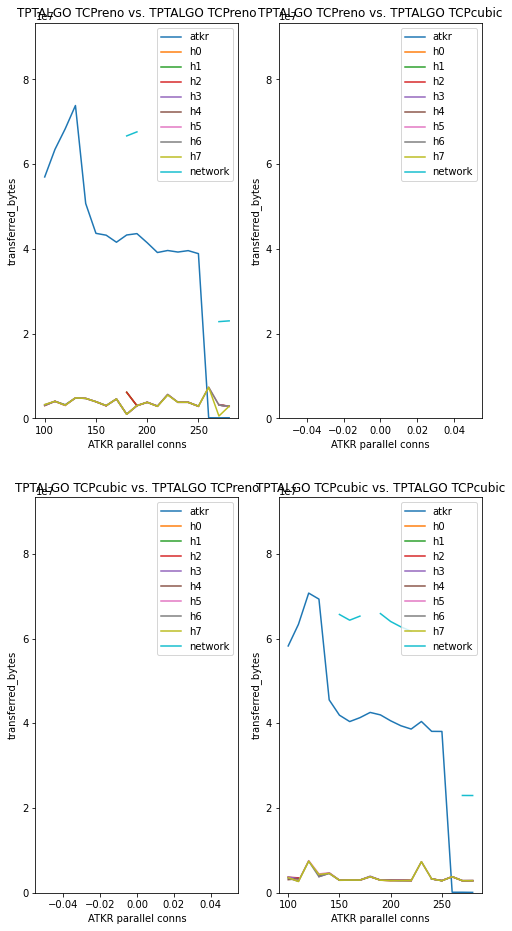

In [43]:
SCALAR_FIG_SZ = 4

for indeX in indices:
    for indeY in indices:
        # if indices.index(indeX) == indices.index(indeY): continue
        AX_R_NAME, AX_R_VALS = indeX
        AX_C_NAME, AX_C_VALS = indeY
        AX_R_LEN , AX_C_LEN  = len(AX_R_VALS), len(AX_C_VALS)
        print(f'{AX_R_LEN} x {AX_C_LEN}\t', AX_R_NAME, '\tvs.  ', AX_C_NAME)
        
        fig, axs = plt.subplots(AX_R_LEN, AX_C_LEN, figsize=(AX_C_LEN*SCALAR_FIG_SZ, AX_R_LEN*SCALAR_FIG_SZ*2))
        
        maxY = 0
        for R_VAL in AX_R_VALS:
            df0 = dfbigboi[dfbigboi[AX_R_NAME] == R_VAL]
            for C_VAL in AX_C_VALS:
                df1 = df0[df0[AX_C_NAME] == C_VAL]
                axi = axs[AX_R_VALS.index(R_VAL)][AX_C_VALS.index(C_VAL)]
                
                net_data = [0] * len(ATK_PARA)
                for HOST in hostnames:
                    df2 = df1[df1['host'] == HOST]
                    host_data = []
                    for APC in ATK_PARA:
                        df3 = df2[df2['APC'] == APC]
                        host_total = df3.sum()['transferred_bytes'] // df3.shape[0]
                        host_data.append(host_total)
                        net_data[ATK_PARA.index(APC)] += host_total
                    maxY = max(maxY, max(host_data), max(net_data))
                    axi.plot(ATK_PARA, host_data, label=HOST)
                axi.plot(ATK_PARA, net_data, label='network')
                axi.legend()
                axi.set_xlabel('ATKR parallel conns')
                axi.set_ylabel('transferred_bytes')
                axi.set_title(f'{AX_R_NAME} {R_VAL} vs. {AX_C_NAME} {C_VAL}')
                
        for R_VAL in AX_R_VALS:
            for C_VAL in AX_C_VALS:
                axi = axs[AX_R_VALS.index(R_VAL)][AX_C_VALS.index(C_VAL)]
                axi.set_ylim(bottom=0, top=maxY)

        fig.savefig(f'VIZ_{AX_R_NAME}-{AX_C_NAME}.png', facecolor="w")